# SMA LAB 8

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
sia = SentimentIntensityAnalyzer()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArtaXerxess/Social-Media-Analytics-Lab/main/SMA%20Lab%208/20191226-reviews.csv")
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


cleaning, removing unnecessary columns

In [ ]:
df.drop(['date','asin','name','rating','verified','title','helpfulVotes'],axis = 1, inplace = True)
df.head()

,body
0,I had the Samsung A600 for awhile which is abs...
1,Due to a software issue between Nokia and Spri...
2,"This is a great, reliable phone. I also purcha..."
3,"I love the phone and all, because I really did..."
4,The phone has been great for every purpose it ...


Assigining scores to every review

In [ ]:
df['scores']=df['body'].apply(lambda body: sia.polarity_scores(str(body)))
df.head()

,body,scores
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp..."
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou..."
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co..."
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp..."
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co..."


In [ ]:
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df['pos']=df['scores'].apply(lambda pos_dict:pos_dict['pos'])
df['neg']=df['scores'].apply(lambda neg_dict:neg_dict['neg'])
df.head()

,body,scores,compound,pos,neg
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp...",0.8629,0.100,0.076
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou...",0.8720,0.100,0.030
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co...",0.8966,0.121,0.048
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.9592,0.143,0.000
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co...",0.7432,0.117,0.067


The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative.

In [ ]:
# Adding new column that classifies the review as positive , negative or neutral
df['type']=''
df.loc[df.compound>0,'type']='POS'
df.loc[df.compound==0,'type']='NEUTRAL'
df.loc[df.compound<0,'type']='NEG'
df.head(10)

,body,scores,compound,pos,neg,type
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp...",0.8629,0.100,0.076,POS
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou...",0.8720,0.100,0.030,POS
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co...",0.8966,0.121,0.048,POS
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.9592,0.143,0.000,POS
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co...",0.7432,0.117,0.067,POS


In [ ]:
from pandas.io.formats.style_render import List
mobileBrands = ['samsung','nokia','apple','google pixel','redmi','xiaomi']
# sentence = 'hello i like nokia '

def brandname(a : List,b : str):
  for brand in a:
    if brand in b:
      return brand

# brandname(mobileBrands,sentence)


rows , cols = df.shape
for row in range(rows):
  df['brands'][row] = brandname(mobileBrands,str(df['body'][row]).lower())

<ipython-input-53-5a1d6a253844>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brands'][row] = brandname(mobileBrands,str(df['body'][row]).lower())


In [ ]:
df.head()

,body,scores,compound,pos,neg,type,brands
0,I had the Samsung A600 for awhile which is abs...,"{'neg': 0.076, 'neu': 0.825, 'pos': 0.1, 'comp...",0.8629,0.100,0.076,POS,samsung
1,Due to a software issue between Nokia and Spri...,"{'neg': 0.03, 'neu': 0.87, 'pos': 0.1, 'compou...",0.8720,0.100,0.030,POS,nokia
2,"This is a great, reliable phone. I also purcha...","{'neg': 0.048, 'neu': 0.831, 'pos': 0.121, 'co...",0.8966,0.121,0.048,POS,samsung
3,"I love the phone and all, because I really did...","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",0.9592,0.143,0.000,POS,None
4,The phone has been great for every purpose it ...,"{'neg': 0.067, 'neu': 0.816, 'pos': 0.117, 'co...",0.7432,0.117,0.067,POS,None


In [ ]:
rows , col = df.shape

def countScores(brandname):
  pos = 0
  neg = 0
  neut = 0
  for i in range(0,rows):
    if df.loc[i]['brands'] == brandname:
      if df.loc[i]['type'] == 'POS':
        pos = pos + 1
      if df.loc[i]['type'] == 'NEG':
        neg = neg + 1
      if df.loc[i]['type'] == 'NEUTRAL':
        neut = neut + 1
  return [pos,neg,neut]


(4011, 1167, 113)

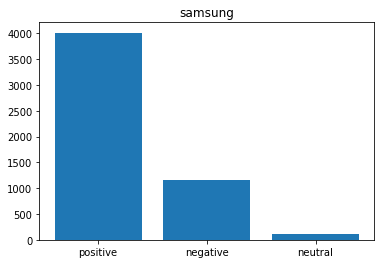

samsung  positive :  4011  negative :  1167  neutral  113 




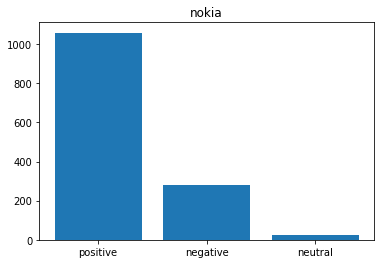

nokia  positive :  1058  negative :  282  neutral  26 




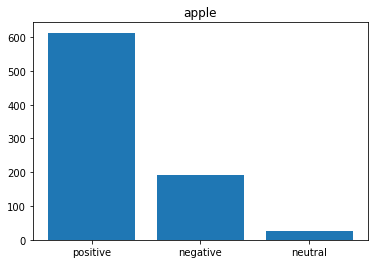

apple  positive :  613  negative :  192  neutral  25 




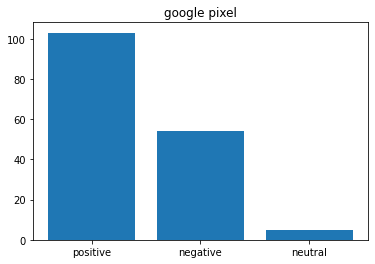

google pixel  positive :  103  negative :  54  neutral  5 




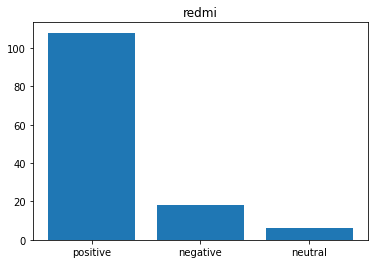

redmi  positive :  108  negative :  18  neutral  6 




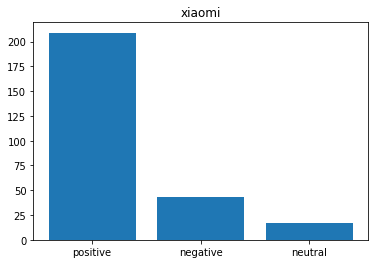

xiaomi  positive :  209  negative :  43  neutral  17 




In [ ]:
mobileBrands = ['samsung','nokia','apple','google pixel','redmi','xiaomi']
x = ['positive','negative','neutral']

def plotter(name):
  y = countScores(name)
  plt.title(name)
  plt.bar(x,y)
  plt.show()
  print(name," positive : ",y[0]," negative : ",y[1]," neutral ",y[2],"\n\n")

for brand in mobileBrands:
  plotter(brand)